In [236]:
import pandas as pd 
import numpy as np 
import pathlib as path
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import sample

In [263]:


PATH_TO_DATA = path.Path.cwd().parent / 'data' / 'unbalanced' / 'pilot_same_day'  #true relational path

#this will define the name of the location to save the processed csv files (note that it will also create a "batch" directory)
batch_name='batch 6' #defines the name of the current subfolder to work on

In [264]:
PATH_TO_BATCH=PATH_TO_DATA / batch_name / 'data'
AMAZON_WORKER_fILE_PATH= PATH_TO_BATCH.parent / path.Path(batch_name.capitalize().replace(' ','_')+'_batch_results.csv')

batch_workers_df=pd.read_csv(AMAZON_WORKER_fILE_PATH)
print('number of amazon workers as reported from the amazon workers file : ',len(batch_workers_df))

#check how many participants are in the downloaded folder: 
participants_list_csvs=[file.name for file in PATH_TO_BATCH.iterdir() if '.csv' in file.name and file.stat().st_size>10000]
participants_list_names=[file.split('_')[0] for file in participants_list_csvs]
print(f'number of participant files (of sufficient size) in the downloaded results batch: {len(participants_list_csvs)}')
print(f'number of unique participant names in the batch: {len(set(participants_list_names))}')
#solve the non unique participants:
non_unique_names=np.unique([name for name in participants_list_names if participants_list_names.count(name)>1])

if len(non_unique_names)>0:
   print(f'\nhandling duplicate participants {len(non_unique_names)}:')
   #find the most recent/biggest file size from each non unique participant: 
   for participant in non_unique_names:
      all_curr_participant_csv_names=list(np.array(participants_list_csvs)[np.where(np.array(participants_list_names)==participant)])
      #get the system info on each of these duplicate files: 
      filesizes=[(PATH_TO_BATCH / file).stat().st_size for file in all_curr_participant_csv_names]
      filedates=[(PATH_TO_BATCH / file).stat().st_ctime for file in all_curr_participant_csv_names]
      largest_filesize_ind=np.argmax(filesizes) #get the index of the largest file from the duplicates
      latest_filedate_ind=np.argmax(filedates)  #get the index of the latest file from the duplicates
      if largest_filesize_ind==latest_filedate_ind: #if the same size is the most recent and largest use it as the participant file: 
         print(f'{participant} has {len(all_curr_participant_csv_names)} duplicate files  - taking the largest and latest file for this participant')
         valid_csv=all_curr_participant_csv_names[largest_filesize_ind]
         #remove it from the current subject duplicates list: 
         all_curr_participant_csv_names.remove(valid_csv)
         #remove the other duplicates fromt he participanst_list_csv: 
         for csv_to_remove in all_curr_participant_csv_names:
            participants_list_csvs.remove(csv_to_remove)
      else:
         print(f'{participant} has {len(all_curr_participant_csv_names)} duplicate files  the largest file is not the latest, so need to resolve this conflict manualy')

#get the aligned names vector after removing the duplicates: 
participants_list_names=[file.split('_')[0] for file in participants_list_csvs]
print(f'\nafter removing duplicate files, number of valid participant files = {len(participants_list_names)}\n')


#make sure the participants reported in the amazon workers corresponds to the valid csv files we got: 
print('going over the workers list as reported in amazon and finding a valid csv file for each')
valid_participants_files=[]
valid_participants_names=[]
for cur_participant in batch_workers_df['WorkerId'].values:
    if cur_participant in participants_list_names: 
      #update the batch workers file with the relevant csv name and validation columns
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'csv_path']=participants_list_csvs[participants_list_names.index(cur_participant)]
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'Approve']='x'
      #print(cur_participant)'
      valid_participants_files.append(participants_list_csvs[participants_list_names.index(cur_participant)]) 
      valid_participants_names.append(cur_participant)
    else:
      print('invalid',cur_participant)
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'Reject']='no results file was found on pavlovia servers'
    
print(f'number of valid participants to go to further processing is: {len(valid_participants_files)}')     
    

number of amazon workers as reported from the amazon workers file :  40
number of participant files (of sufficient size) in the downloaded results batch: 33
number of unique participant names in the batch: 33

after removing duplicate files, number of valid participant files = 33

going over the workers list as reported in amazon and finding a valid csv file for each
invalid A3REPTAHMY4QO
invalid A168NQV5RKT0GV
invalid AWJYBW0NUQFP3
invalid A38WYT615SU6FR
invalid A3E01V6BFM5DVR
invalid A2AD1O1NYA478K
invalid A2KY4GQSDQ7ZT3
number of valid participants to go to further processing is: 33


In [265]:
batch_workers_df[['WorkerId','Approve','Reject','Answer.surveycode','csv_path']] #will add more columns with more information on disqualfication so we can decide if we pay or not

,WorkerId,Approve,Reject,Answer.surveycode,csv_path
0,A10FSZLB75VZ14,x,NaN,tjs,A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv
1,AXTIQHZSLC0FE,x,NaN,tjs,AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv
2,ARIWYNIH12MLF,x,NaN,tjs,ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv
3,A3J4YYW1M62T39,x,NaN,tjs,A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv
4,A34Z9LMI089LMT,x,NaN,tjs,A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv
5,AZ5KAKZR0CVR,x,NaN,tjs,AZ5KAKZR0CVR_2022-10-18_10h46.54.594.csv
6,A2P0EZBOOTBSAL,x,NaN,tjs,A2P0EZBOOTBSAL_2022-10-18_08h31.22.807.csv
7,AH7Z2M3KSQ4DW,x,NaN,tjs,AH7Z2M3KSQ4DW_2022-10-18_12h28.46.444.csv
8,A3VG8YYPGF02CA,x,NaN,'tjs',A3VG8YYPGF02CA_2022-10-18_20h50.07.967.csv
9,A3REPTAHMY4QO,NaN,no results file was found on pavlovia servers,'tjs',NaN


In [266]:
def find_largest_consequtive_repetition(responses_array):
#add a stop value so the loop will use the logic also if the end of the responses is all repeating: 
    responses_array=np.append(responses_array,[99])
    longest_rep_dict=dict()
    last_input=responses_array[0]
    consequtive_rep_counter=0
    for response in responses_array[1:]: 
        if response==last_input: #if consequtive rep: 
            consequtive_rep_counter=consequtive_rep_counter+1 #add to counter
        else: #once a new entry is in the vector - store the counter rep information 
            if last_input in longest_rep_dict.keys(): #if it was allready stored in our dictionary
                if longest_rep_dict[last_input]<consequtive_rep_counter: #replace the counter only if it is higher than what stored in dict
                    longest_rep_dict[last_input]=consequtive_rep_counter
            else: #this entry is not yet in the dictionary: add it 
                longest_rep_dict[last_input]=consequtive_rep_counter
            
            consequtive_rep_counter=0
            last_input=response
    return max(longest_rep_dict.values())

In [267]:
def process_worker_results(PATH_TO_BATCH,subject_name):
    cur_sub=pd.read_csv(PATH_TO_BATCH / subject_name)
    sub_demographics=cur_sub[['workID','Age','Gender']].iloc[0]

    #extract demo related information: 

    #if participant did not click on the arrow during the demo a 'demo_encoding_response.rt' colmumn wont exists: 
    #thus we will create one and fill it with nans (so everything will be consistent with other participants)
    if not('demo_encoding_response.rt' in cur_sub.columns):
        cur_sub['demo_encoding_response.rt']=np.nan
    demo_columns=['demo_encoding_loop.thisTrialN','DemoImage','DemoCorrect','demo_encoding_response.rt','demo_encoding_response.keys']

    sub_demo_information=cur_sub[demo_columns]
    empty_inds=sub_demo_information.loc[sub_demo_information.isnull().apply(lambda x: all(x), axis=1)].index
    #drop irrelevant columns: 
    sub_demo_information=sub_demo_information.drop(index=empty_inds)


    #extract the demo test columns: 
    demo_test_columns=['demo_test_response.keys','demo_test_response.corr','demo_test_response.rt','demo_test_loop.thisTrialN','DemoImage1','DemoImage2','DemoCorrectTest']
    sub_demo_test_information=cur_sub[demo_test_columns]
    empty_inds=sub_demo_test_information.loc[sub_demo_test_information.isnull().apply(lambda x: all(x), axis=1)].index
    #drop irrelevant columns: 
    sub_demo_test_information=sub_demo_test_information.drop(index=empty_inds)

    demo_df=pd.concat([sub_demo_information.reset_index(),sub_demo_test_information.reset_index()],axis=1)

    #extract real experiment related information: 

    #if participant did not click on the arrow during the encoding a 'test_encoding_response.rt' column wont exists: 
    #thus we will create one and fill it with nans (so everything will be consistent with other participants)
    if not('test_encoding_response.rt' in cur_sub.columns):
        cur_sub['test_encoding_response.rt']=np.nan


    encoding_related_columns=['test_encoding_response.keys','test_encoding_response.corr','trials.thisTrialN','target_image','pair','layer','correct','test_encoding_response.rt','key_resp_end.keys']
    sub_encoding_information=cur_sub[encoding_related_columns]
    #encoding section ends with a key press of the space key: so seperate this phase by finding this space key row
    end_of_section_ind=np.where(sub_encoding_information['key_resp_end.keys']=='space')[0][0]
    sub_encoding_information=sub_encoding_information.iloc[0:end_of_section_ind]
    #remove all the rows that precede the real encoding phase: 
    empty_inds=sub_encoding_information.loc[sub_encoding_information.isnull().apply(lambda x: all(x), axis=1)].index
    sub_encoding_information=sub_encoding_information.drop(index=empty_inds).reset_index()

    #extract real experiment TEST related information: 
    test_related_columns=['layer','correct','test_test_response.keys','test_test_response.corr','test_test_response.rt','trials_2.thisRepN','trials_2.thisTrialN','trials_2.thisN','trials_2.thisIndex','trials_2.ran','image1','image2']
    sub_test_information=cur_sub[test_related_columns].iloc[end_of_section_ind+2:-1]


    subject_dictionary=dict()
    subject_dictionary['demographics']=sub_demographics
    subject_dictionary['demo_df']=demo_df
    subject_dictionary['encoding_df']=sub_encoding_information
    subject_dictionary['test_df']=sub_test_information

    return subject_dictionary



In [268]:
all_subjects_demo_df=pd.DataFrame()
all_subjects_encoding_df=pd.DataFrame()
all_subjects_test_df=pd.DataFrame()
all_subjects_biographics_df=pd.DataFrame()

for subject_name in valid_participants_files:
    print(subject_name)
    curr_subject_dictionary=process_worker_results(PATH_TO_BATCH,subject_name)
    curr_demo_df=curr_subject_dictionary['demo_df']
    curr_demo_df['subject']=subject_name
    curr_test_df=curr_subject_dictionary['test_df']
    curr_test_df['subject']=subject_name
    curr_encoding_df=curr_subject_dictionary['encoding_df']
    curr_encoding_df['subject']=subject_name
    curr_demographics_df=curr_subject_dictionary['demographics']
    curr_demographics_df['subject']=subject_name

    all_subjects_demo_df=pd.concat([all_subjects_demo_df,curr_demo_df],axis=0,ignore_index=True)
    all_subjects_encoding_df=pd.concat([all_subjects_encoding_df,curr_encoding_df],axis=0,ignore_index=True)
    all_subjects_test_df=pd.concat([all_subjects_test_df,curr_test_df],axis=0,ignore_index=True)
    all_subjects_biographics_df=pd.concat([all_subjects_biographics_df,pd.DataFrame(curr_demographics_df).T],axis=0,ignore_index=True)


all_subjects_demo_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_demo_df.csv')
all_subjects_encoding_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_encoding_df.csv')
all_subjects_test_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_test_df.csv')
all_subjects_biographics_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_biographics_df.csv')

A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv
AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv
ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv
A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv
A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv
AZ5KAKZR0CVR_2022-10-18_10h46.54.594.csv
A2P0EZBOOTBSAL_2022-10-18_08h31.22.807.csv
AH7Z2M3KSQ4DW_2022-10-18_12h28.46.444.csv
A3VG8YYPGF02CA_2022-10-18_20h50.07.967.csv
A37R0JYAB3QEX9_2022-10-18_08h02.39.722.csv
A34H7SANVXDBFA_2022-10-18_09h55.18.742.csv
A2EZ5YR6PJ6XX0_2022-10-18_09h54.44.998.csv
A12NT768CR36E5_2022-10-18_09h39.25.114.csv
A1UFS2BDTPT5DX_2022-10-18_08h20.20.570.csv
A4VUQ6627RJX8_2022-10-18_06h07.03.799.csv
A222GZB608T1B8_2022-10-18_09h27.18.042.csv
A3TH6B3RUD1MUQ_2022-10-18_08h44.58.741.csv
A2HJKL3641S7R_2022-10-18_08h51.49.434.csv
AILT4SWETTAUL_2022-10-18_08h09.46.299.csv
A2TC7B46WQ695O_2022-10-18_09h13.52.957.csv
ACR6012D868PP_2022-10-18_08h48.54.805.csv
A2TAMPLWAYL5WJ_2022-10-18_08h41.17.030.csv
AZ87BZ1LEEZVS_2022-10-11_24h55.05.727.csv
A3KXM8LSH21DYR_2022-1

In [269]:
from unicodedata import category

# if there are any empty values - fill with mean of subjects age 
mean_value = all_subjects_biographics_df['Age'].mean()
all_subjects_biographics_df['Age'].fillna(value=mean_value, inplace=True)
all_subjects_biographics_df['Age'] = all_subjects_biographics_df['Age'].astype(np.int64)

all_subjects_biographics_df['Age']=all_subjects_biographics_df['Age'].astype(int)
all_subjects_biographics_df['Gender'].replace({'woman':'female','FEMLAE':'female','Male':'male','MALE':'male','FEMALE':'female','Female':'female','ale':'male'},inplace=True)
if len(set(all_subjects_biographics_df['Gender'].values))<=2:
    print('transformed the gender column to be consistent having two possible values:',np.unique(all_subjects_biographics_df['Gender'].values))
else: 
    print('gender is still inconsistent with more than 2 unique values:',set(all_subjects_biographics_df['Gender'].values))
all_subjects_biographics_df['Gender']=all_subjects_biographics_df['Gender'].astype("category")

mean_age,min_age,max_age=all_subjects_biographics_df['Age'].mean(),all_subjects_biographics_df['Age'].min(),all_subjects_biographics_df['Age'].max()
female_prop=all_subjects_biographics_df.loc[all_subjects_biographics_df['Gender']=='female','Gender'].count()/all_subjects_biographics_df['Gender'].count()

print(f'Mean age: {mean_age:.2f}, range: [{min_age} - {max_age}], {female_prop:.2f}% female')


gender is still inconsistent with more than 2 unique values: {'femle', 'female', 'male'}
Mean age: 36.61, range: [22 - 63], 0.61% female


# this part plots the seperate dataframes: 
### demo phase (encoding and test in the same dataframe)
### encoding experiment phase
### test experiment phase

In [244]:
all_subjects_demo_df.head(5)

,index,demo_encoding_loop.thisTrialN,DemoImage,DemoCorrect,demo_encoding_response.rt,demo_encoding_response.keys,index,demo_test_response.keys,demo_test_response.corr,demo_test_response.rt,demo_test_loop.thisTrialN,DemoImage1,DemoImage2,DemoCorrectTest,subject
0,4,0.0,flower1.jpg,NaN,NaN,NaN,12.0,left,1.0,8.1480,0.0,flower1.jpg,flower1_pair.jpg,left,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
1,5,1.0,flower2.jpg,NaN,NaN,NaN,13.0,right,1.0,3.1992,1.0,flower2_pair.jpg,flower2.jpg,right,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
2,6,2.0,left.jpg,left,2.0469,left,14.0,left,1.0,2.9054,2.0,flower3.jpg,flower3_pair.jpg,left,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
3,7,3.0,flower3.jpg,NaN,NaN,NaN,15.0,left,1.0,4.1813,3.0,flower4.jpg,flower4_pair.jpg,left,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
4,8,4.0,flower4.jpg,NaN,NaN,NaN,16.0,right,1.0,1.8291,4.0,flower5_pair.jpg,flower5.jpg,right,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv


In [245]:
all_subjects_encoding_df.head(5)

,index,test_encoding_response.keys,test_encoding_response.corr,trials.thisTrialN,target_image,pair,layer,correct,test_encoding_response.rt,key_resp_end.keys,subject
0,20,NaN,1.0,0.0,2901939379-143480.jpg,2981229442-369621.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
1,21,NaN,1.0,1.0,2964218374-144967.jpg,2883254439-140940.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
2,22,NaN,1.0,2.0,2964216465-219242.jpg,2898619327-366362.jpg,3.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
3,23,NaN,1.0,3.0,2452381505-199546.jpg,2238567168-34916.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
4,24,NaN,1.0,4.0,2449442529-124446.jpg,2460547536-274181.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv


In [246]:
all_subjects_test_df.head(5)

,layer,correct,test_test_response.keys,test_test_response.corr,test_test_response.rt,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,trials_2.ran,image1,image2,subject
0,1.0,right,left,0.0,3.4835,0.0,0.0,0.0,0.0,1.0,2611628310-206388.jpg,2883256307-365057.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
1,1.0,right,left,0.0,3.9885,0.0,1.0,1.0,1.0,1.0,2964218432-369263.jpg,2898624426-291546.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
2,3.0,right,left,0.0,1.9228,0.0,2.0,2.0,2.0,1.0,2964207374-144577.jpg,2898617468-68274.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
3,1.0,right,right,1.0,1.7194,0.0,3.0,3.0,3.0,1.0,2238499057-320266.jpg,2238428357-313623.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
4,2.0,right,right,1.0,2.1216,0.0,4.0,4.0,4.0,1.0,2984615361-295510.jpg,2883268412-365898.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv


In [270]:
#this section extract information from the demo phase: it creates a df (all_subjects_summary_demo_info) containingsingle row per participants with metrics from the demo phase (average accuracy, RTs and so on (this can be used to screen participatns for further analysis)):
all_subjects_summary_demo_info=pd.DataFrame(index=list(all_subjects_demo_df['subject'].unique()))

for cur_subject in all_subjects_demo_df['subject'].unique():
    cur_sub_demo_encoding=all_subjects_demo_df.loc[all_subjects_demo_df['subject']==cur_subject]
    
    #get only attention check related info: 
    curr_subjects_summary_demo_info=cur_sub_demo_encoding[['demo_encoding_response.keys','DemoCorrect','demo_encoding_response.rt']].copy().dropna()
    if len(curr_subjects_summary_demo_info)==0: #empty - the participant didnt respond on the arrow at all: 
       all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=0 
       all_subjects_summary_demo_info.loc[cur_subject,'arrow_rt']=np.nan
    else: 
        all_subjects_summary_demo_info.loc[cur_subject,'arrow_rt']=curr_subjects_summary_demo_info['demo_encoding_response.rt'].values
        if all(curr_subjects_summary_demo_info['DemoCorrect']==curr_subjects_summary_demo_info['demo_encoding_response.keys']):
            all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=1
        else:
            all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=0


    #get the correctness of the demo testing phase: 
    cur_sub_demo_test_performence=cur_sub_demo_encoding[['DemoCorrectTest','demo_test_response.keys','demo_test_response.rt']].copy().dropna()
    test_match_df=pd.DataFrame(columns=['arrow_correct'],data=cur_sub_demo_test_performence['DemoCorrectTest']==cur_sub_demo_test_performence['demo_test_response.keys'])
    test_match_df['demo_test_response.rt']=cur_sub_demo_test_performence['demo_test_response.rt']
    accuracy=test_match_df['arrow_correct'].mean()
    mean_rt=test_match_df['demo_test_response.rt'].mean()
    correct_and_incorrect_rts=test_match_df.groupby('arrow_correct').aggregate({'demo_test_response.rt':'mean'})
    #update the summary info row: 
    all_subjects_summary_demo_info.loc[cur_subject,'demo_accuracy']=accuracy
    all_subjects_summary_demo_info.loc[cur_subject,'RT_overall_mean']=mean_rt
    all_subjects_summary_demo_info.loc[cur_subject,['RT_incorrect_mean','RT_correct_mean']]=np.nan

    if False in correct_and_incorrect_rts.index:
        all_subjects_summary_demo_info.loc[cur_subject,'RT_incorrect_mean']=correct_and_incorrect_rts.loc[False].values[0]
    if True in correct_and_incorrect_rts.index:
        all_subjects_summary_demo_info.loc[cur_subject,'RT_correct_mean']=correct_and_incorrect_rts.loc[True].values[0]


#add a prefix to column names: 
all_subjects_summary_demo_info.columns=['demo_'+col for col in all_subjects_summary_demo_info.columns]
all_subjects_summary_demo_info.head(5)

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean
A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv,1.1350,1.0,1.000000,2.023400,NaN,2.02340
AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv,2.7211,1.0,0.666667,3.792517,3.11855,4.12950
ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv,2.0982,1.0,0.833333,2.216733,2.77020,2.10604
A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv,0.9962,1.0,0.833333,1.762317,1.90160,1.73446
A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv,0.9234,1.0,0.833333,2.043450,3.02410,1.84732


In [271]:
#this part extract summary information from the experiment encoding phase: attention check accuracy and timings: 
all_subjects_summary_encoding_info=pd.DataFrame(index=list(all_subjects_encoding_df['subject'].unique()))

for cur_subject in all_subjects_encoding_df['subject'].unique():
    cur_sub_encoding=all_subjects_encoding_df.loc[all_subjects_encoding_df['subject']==cur_subject]
    
    #get only attention check related info: 
    cur_sub_encoding=cur_sub_encoding[['test_encoding_response.keys','correct','test_encoding_response.rt']].copy().dropna(how = 'all')
    if len(cur_sub_encoding)==0: #empty - the participant didnt respond on the arrow at all: 
       all_subjects_summary_encoding_info.loc[cur_subject,'arrow_accuracy']=0 
       all_subjects_summary_encoding_info.loc[cur_subject,'arrow_mean_rt']=np.nan
    else: 
        all_subjects_summary_encoding_info.loc[cur_subject,'arrow_mean_rt']=cur_sub_encoding['test_encoding_response.rt'].mean()
        arrow_accuracy=(cur_sub_encoding['correct']==cur_sub_encoding['test_encoding_response.keys']).mean()
        all_subjects_summary_encoding_info.loc[cur_subject,'arrow_accuracy']=arrow_accuracy



#add a prefix to column names: 
all_subjects_summary_encoding_info.columns=['encoding_'+col for col in all_subjects_summary_encoding_info.columns]        
all_subjects_summary_encoding_info.head(5)

,encoding_arrow_mean_rt,encoding_arrow_accuracy
A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv,1.214075,0.8
AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv,1.957760,1.0
ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv,0.691760,1.0
A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv,1.035640,1.0
A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv,0.229650,0.4


In [272]:
#this part extract summary information from the experiment testing phase: attention check accuracy and timings: 
all_subjects_summary_testing_info=pd.DataFrame(index=list(all_subjects_test_df['subject'].unique()))

for cur_subject in all_subjects_test_df['subject'].unique():
    cur_sub_testing=all_subjects_test_df.loc[all_subjects_test_df['subject']==cur_subject]

    #get the correctness of the testing phase: 
    cur_sub_testing_performence=cur_sub_testing[['correct','test_test_response.keys','test_test_response.rt','layer','test_test_response.corr']].copy().dropna()


    test_match_df=pd.DataFrame(columns=['correct'],data=cur_sub_testing_performence['correct']==cur_sub_testing_performence['test_test_response.keys'])
    test_match_df['test_test_response.rt']=cur_sub_testing_performence['test_test_response.rt']
    accuracy=test_match_df['correct'].mean()
    mean_rt=test_match_df['test_test_response.rt'].mean()
    correct_and_incorrect_rts_overall=test_match_df.groupby('correct').aggregate({'test_test_response.rt':'mean'})
    
    #update the summary info row: 
    all_subjects_summary_testing_info.loc[cur_subject,'Test_overall_accuracy']=accuracy
    all_subjects_summary_testing_info.loc[cur_subject,'RT_overall_mean']=mean_rt
    all_subjects_summary_testing_info.loc[cur_subject,['RT_incorrect_mean','RT_correct_mean']]=np.nan

    if False in correct_and_incorrect_rts_overall.index:
        all_subjects_summary_testing_info.loc[cur_subject,'RT_incorrect_mean']=correct_and_incorrect_rts_overall.loc[False].values[0]
    if True in correct_and_incorrect_rts_overall.index:
        all_subjects_summary_testing_info.loc[cur_subject,'RT_correct_mean']=correct_and_incorrect_rts_overall.loc[True].values[0]



    #extract layer wise information (accuracy and rt):
    correct_and_incorrect_rts=cur_sub_testing_performence.groupby('layer').aggregate({'test_test_response.rt':'mean','test_test_response.corr':'mean'})
    all_subjects_summary_testing_info.loc[cur_subject,['layer_1_rt','layer_1_accuracy','layer_2_rt','layer_2_accuracy','layer_3_rt','layer_3_accuracy']]=correct_and_incorrect_rts.values.flatten()


    #check the longest structured strike (to find bots or very unattentive participants):
    responses=cur_sub_testing_performence['test_test_response.keys'].replace({'left':1,'right':2}).values
    max_iter=find_largest_consequtive_repetition(responses)

    all_subjects_summary_testing_info.loc[cur_subject,'longest_response_strike']=max_iter

#add a prefix to column names: 
all_subjects_summary_testing_info.columns=['testing_'+col for col in all_subjects_summary_testing_info.columns]        
all_subjects_summary_testing_info.head()

,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv,0.733333,2.191362,1.916862,2.291180,1.849830,0.75,1.727285,0.75,2.996970,0.70,8.0
AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv,0.883333,2.995050,3.955971,2.868136,3.097230,0.95,2.639020,0.90,3.248900,0.80,7.0
ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv,0.650000,1.448050,1.339800,1.506338,1.587505,0.70,1.428970,0.70,1.327675,0.55,4.0
A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv,0.750000,1.578678,1.547613,1.589033,1.506295,0.85,1.548585,0.75,1.681155,0.65,3.0
A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv,0.683333,2.056562,1.915400,2.121978,2.051400,0.65,2.178980,0.85,1.939305,0.55,4.0


In [273]:
def find_outlier_responses(sub_test_dataframe,fast_threshold=0.1,fast_allowed_count=2,slow_threshold=10,slow_allowed_count=2):
    isfast_outlier=(sub_test_dataframe['test_test_response.rt']<fast_threshold).sum()>fast_allowed_count
    isslow_outlier=(sub_test_dataframe['test_test_response.rt']>slow_threshold).sum()>slow_allowed_count
    return isfast_outlier,isslow_outlier

In [274]:
#combine all oneliners into a single matrix - 1 line per participant with all information we want:
data_df_for_analysis=pd.concat([all_subjects_summary_demo_info,all_subjects_summary_encoding_info,all_subjects_summary_testing_info],axis=1)
data_df_for_analysis


#define thresholds: 
demo_accuracy_treshold=0.5
demo_arrow_correctness=1
encoding_arrow_accuracy=0.6
longest_allowed_consequtive_strike=15
fast_threshold=0.3
fast_allowed_count=3
slow_threshold=10
slow_allowed_count=2


#how many participants would fail the demo (did not correctly answered the arrow or had less than 60% performence)
demo_criterions_accuracy=data_df_for_analysis['demo_demo_accuracy']>=demo_accuracy_treshold
demo_criterions_attention_check=data_df_for_analysis['demo_arrow_correct']>=demo_arrow_correctness
#find which participants performed pooly on the attention checks of the experiment encoding phase: 
encoding_ciriterions=data_df_for_analysis['encoding_arrow_accuracy']>encoding_arrow_accuracy
#remove participants that are too slow: 
test_criterions_strike=data_df_for_analysis['testing_longest_response_strike']<longest_allowed_consequtive_strike

too_fast_criterions=[]
too_slow_criterions=[]
for subject in data_df_for_analysis.index:
    sub_test_dataframe=all_subjects_test_df[all_subjects_test_df['subject']==subject]
    toofast_criterion,tooslow_criterion=find_outlier_responses(sub_test_dataframe,fast_threshold=fast_threshold,fast_allowed_count=fast_allowed_count,slow_threshold=slow_threshold,slow_allowed_count=slow_allowed_count)
    too_slow_criterions.append(not tooslow_criterion)
    too_fast_criterions.append(not toofast_criterion)


print(f'summary for criterions:')
print(f'demo accuracy higher than {demo_accuracy_treshold} - qualified: {demo_criterions_accuracy.sum()}')
print(f'demo attention check correctness equals {demo_arrow_correctness} - qualified: {demo_criterions_attention_check.sum()}')
print(f'experiment encoding attention check accuracy {encoding_arrow_accuracy} - qualified: {encoding_ciriterions.sum()}')
print(f'experiment longest consequtive strike of maximum of  {longest_allowed_consequtive_strike} responses - qualified: {test_criterions_strike.sum()}')
print(f'test too fast (thresold: {fast_threshold}, allowed count: {fast_allowed_count} qualified: {sum(too_fast_criterions)}')
print(f'test too slow (thresold: {slow_threshold}, allowed count: {slow_allowed_count} qualified: {sum(too_slow_criterions)}')


#accuracy criterion on the test: 
test_accuracy_critertions=(data_df_for_analysis['testing_Test_overall_accuracy']>=0.61) | (data_df_for_analysis[['testing_layer_1_accuracy' ,'testing_layer_2_accuracy' ,'testing_layer_3_accuracy']]>=0.75).T.any()
#remove participants that were discarded based on behavior up to the test and now qualify or disqualify based on test accuracy (do they have atleast 1 significant (binomial test) accuracy in one layer, or above threshold in overall accuracy )
only_qualified=demo_criterions_accuracy & demo_criterions_attention_check & encoding_ciriterions & test_criterions_strike & too_fast_criterions & too_slow_criterions & test_accuracy_critertions

print(f'OVERALL: number of qualified participants (adhere to all criterions): {sum(only_qualified)}')



summary for criterions:
demo accuracy higher than 0.5 - qualified: 28
demo attention check correctness equals 1 - qualified: 33
experiment encoding attention check accuracy 0.6 - qualified: 18
experiment longest consequtive strike of maximum of  15 responses - qualified: 32
test too fast (thresold: 0.3, allowed count: 3 qualified: 26
test too slow (thresold: 10, allowed count: 2 qualified: 29
OVERALL: number of qualified participants (adhere to all criterions): 11


In [275]:
data_df_for_analysis

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A10FSZLB75VZ14_2022-10-18_09h27.25.369.csv,1.13500,1.0,1.000000,2.023400,NaN,2.023400,1.214075,0.8,0.733333,2.191362,1.916862,2.291180,1.849830,0.75,1.727285,0.75,2.996970,0.70,8.0
AXTIQHZSLC0FE_2022-10-18_08h05.30.739.csv,2.72110,1.0,0.666667,3.792517,3.118550,4.129500,1.957760,1.0,0.883333,2.995050,3.955971,2.868136,3.097230,0.95,2.639020,0.90,3.248900,0.80,7.0
ARIWYNIH12MLF_2022-10-18_08h12.13.730.csv,2.09820,1.0,0.833333,2.216733,2.770200,2.106040,0.691760,1.0,0.650000,1.448050,1.339800,1.506338,1.587505,0.70,1.428970,0.70,1.327675,0.55,4.0
A3J4YYW1M62T39_2022-10-18_08h33.40.910.csv,0.99620,1.0,0.833333,1.762317,1.901600,1.734460,1.035640,1.0,0.750000,1.578678,1.547613,1.589033,1.506295,0.85,1.548585,0.75,1.681155,0.65,3.0
A34Z9LMI089LMT_2022-10-18_07h03.31.586.csv,0.92340,1.0,0.833333,2.043450,3.024100,1.847320,0.229650,0.4,0.683333,2.056562,1.915400,2.121978,2.051400,0.65,2.178980,0.85,1.939305,0.55,4.0
AZ5KAKZR0CVR_2022-10-18_10h46.54.594.csv,1.31670,1.0,0.666667,1.659333,1.420500,1.778750,1.387867,0.6,0.683333,1.763338,1.651574,1.815132,2.037175,0.85,1.799505,0.55,1.453335,0.65,8.0
A2P0EZBOOTBSAL_2022-10-18_08h31.22.807.csv,1.27000,1.0,0.833333,6.393833,10.503000,5.572000,1.054200,1.0,0.850000,7.463250,13.361778,6.422333,10.603750,0.95,5.417100,0.75,6.368900,0.85,4.0
AH7Z2M3KSQ4DW_2022-10-18_12h28.46.444.csv,0.69230,1.0,0.500000,1.680367,2.460633,0.900100,0.733120,1.0,0.650000,2.056142,2.326981,1.910305,2.109695,0.75,1.738210,0.60,2.320520,0.60,6.0
A3VG8YYPGF02CA_2022-10-18_20h50.07.967.csv,1.50900,1.0,0.500000,1.493783,1.176900,1.810667,0.802700,0.2,0.466667,0.175740,0.212016,0.134282,0.153080,0.40,0.155300,0.50,0.218840,0.50,5.0
A37R0JYAB3QEX9_2022-10-18_08h02.39.722.csv,0.64040,1.0,0.833333,1.569517,1.932500,1.496920,0.615875,0.8,0.800000,1.754395,1.806125,1.741463,1.699485,0.85,1.614240,0.90,1.949460,0.65,6.0


In [253]:
#update the batch_workers_df  with columns representing disqualification reasons: 
tooslow_df=pd.DataFrame(data=too_slow_criterions,index=data_df_for_analysis.index,columns=['not_too_slow'])
toofast_df=pd.DataFrame(data=too_fast_criterions,index=data_df_for_analysis.index,columns=['not_too_Fast'])
test_accuracy_critertions=pd.DataFrame(data=test_accuracy_critertions,index=data_df_for_analysis.index, columns=['sufficient_test_acc'])
disqualification_df=pd.concat([demo_criterions_accuracy,demo_criterions_attention_check,encoding_ciriterions,test_criterions_strike,tooslow_df,toofast_df,test_accuracy_critertions],axis=1)
disqualification_df.head(5)


,demo_demo_accuracy,demo_arrow_correct,encoding_arrow_accuracy,testing_longest_response_strike,not_too_slow,not_too_Fast,sufficient_test_acc
AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv,True,True,True,True,True,True,False
ACUK17I51KVXF_2022-10-19_10h23.23.440.csv,True,True,True,True,True,True,True
A96TDNBSXG3NJ_2022-10-19_07h41.25.219.csv,True,True,False,True,True,True,False
AW9ODYOD9PYHX_2022-10-19_07h13.52.846.csv,True,True,True,True,True,True,True
A1SHLWKA0UH1IS_2022-10-19_08h12.50.994.csv,True,True,True,True,True,True,True


In [254]:
#merge workers_df with disqualification and save: 
index_list=[ind.split('_')[0] for ind in disqualification_df.index]
disqualification_df['WorkerId']=index_list
batch_workers_df_extended = batch_workers_df.merge(disqualification_df, on="WorkerId", how = 'inner')
batch_workers_df_extended = batch_workers_df.merge(disqualification_df, on="WorkerId", how = 'outer')

#add qualification column: (currently any participant will get this qualification (even if he just openneded the experiment and quit, because we dont want him back)
qualification_colname='UPDATE-completed memory rep'
batch_workers_df_extended[qualification_colname]=1

batch_workers_df_extended.to_csv(PATH_TO_BATCH.parent/ path.Path(batch_name+'_batch_results_extended_with_disqualification.csv'))
batch_workers_df.to_csv(PATH_TO_BATCH.parent/ path.Path(batch_name+'_batch_results_for_upload.csv'))


In [255]:
#extract data that passes all criterions: 
final_participants_df=data_df_for_analysis[only_qualified]

final_participants_df

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
ACUK17I51KVXF_2022-10-19_10h23.23.440.csv,1.7150,1.0,0.666667,2.410833,3.515000,1.858750,1.794500,0.8,0.616667,2.080100,2.170348,2.024000,2.085100,0.75,2.042450,0.45,2.112750,0.65,4.0
AW9ODYOD9PYHX_2022-10-19_07h13.52.846.csv,0.8747,1.0,0.666667,4.542300,8.137150,2.744875,1.070620,1.0,0.733333,2.086355,2.183088,2.051180,2.111690,0.90,2.141870,0.60,2.005505,0.70,5.0
A1SHLWKA0UH1IS_2022-10-19_08h12.50.994.csv,0.6929,1.0,1.000000,1.673650,NaN,1.673650,0.615100,1.0,0.983333,1.783638,1.817300,1.783068,1.836655,0.95,1.671005,1.00,1.843255,1.00,3.0
AFT9JOHMU11KY_2022-10-19_07h33.47.779.csv,1.2060,1.0,0.833333,3.461667,2.460000,3.662000,1.801400,1.0,0.566667,2.031183,1.895000,2.135324,2.164150,0.50,2.073950,0.45,1.855450,0.75,3.0
A1N37RFT8OXBNN_2022-10-19_07h18.14.061.csv,1.5880,1.0,0.833333,3.432500,4.001000,3.318800,1.143400,1.0,0.833333,3.834317,5.891200,3.422940,2.980850,0.95,3.906200,0.75,4.615900,0.80,4.0
AB09F0Q4T10TE_2022-10-19_06h04.14.037.csv,0.7993,1.0,0.666667,1.592300,1.834200,1.471350,0.601700,1.0,0.650000,2.374460,2.576224,2.265818,2.266000,0.60,2.419765,0.70,2.437615,0.65,10.0
A1F0VEHWK3IAF4_2022-10-19_07h04.42.267.csv,2.0427,1.0,0.666667,2.185783,1.777800,2.389775,1.438300,1.0,0.700000,1.754475,1.632167,1.806893,1.720470,0.75,1.984850,0.75,1.558105,0.60,11.0
A1JT6ZF5PMQBM1_2022-10-19_10h03.43.540.csv,1.0689,1.0,0.500000,2.726167,2.928833,2.523500,1.227540,1.0,0.766667,2.048528,2.317671,1.966615,2.101920,0.80,2.107665,0.70,1.936000,0.80,7.0
A3QYA7EFCS7BA2_2022-10-19_09h04.54.524.csv,0.7878,1.0,1.000000,1.305217,NaN,1.305217,0.641820,1.0,0.833333,1.540307,1.755520,1.497264,1.472080,0.85,1.522175,0.90,1.626665,0.75,6.0
A3EWKKJTP2GY2L_2022-10-19_09h35.42.864.csv,2.6520,1.0,0.833333,3.458000,1.574000,3.834800,1.280400,1.0,0.700000,1.509583,1.542000,1.495690,1.451650,0.75,1.411800,0.65,1.665300,0.70,4.0


In [256]:
total_data = pd.concat([data_df_for_analysis,disqualification_df], axis = 1)
total_data.head()

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_3_accuracy,testing_longest_response_strike,demo_demo_accuracy,demo_arrow_correct,encoding_arrow_accuracy,testing_longest_response_strike,not_too_slow,not_too_Fast,sufficient_test_acc,WorkerId
AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv,2.0469,1.0,1.000000,3.379350,NaN,3.379350,1.95916,1.0,0.600000,2.268175,...,0.60,5.0,True,True,True,True,True,True,False,AOQP9IL4MK3ZQ
ACUK17I51KVXF_2022-10-19_10h23.23.440.csv,1.7150,1.0,0.666667,2.410833,3.515000,1.858750,1.79450,0.8,0.616667,2.080100,...,0.65,4.0,True,True,True,True,True,True,True,ACUK17I51KVXF
A96TDNBSXG3NJ_2022-10-19_07h41.25.219.csv,0.8556,1.0,0.500000,1.870917,1.876767,1.865067,2.15335,0.4,0.483333,1.820657,...,0.55,2.0,True,True,False,True,True,True,False,A96TDNBSXG3NJ
AW9ODYOD9PYHX_2022-10-19_07h13.52.846.csv,0.8747,1.0,0.666667,4.542300,8.137150,2.744875,1.07062,1.0,0.733333,2.086355,...,0.70,5.0,True,True,True,True,True,True,True,AW9ODYOD9PYHX
A1SHLWKA0UH1IS_2022-10-19_08h12.50.994.csv,0.6929,1.0,1.000000,1.673650,NaN,1.673650,0.61510,1.0,0.983333,1.783638,...,1.00,3.0,True,True,True,True,True,True,True,A1SHLWKA0UH1IS


In [257]:
#save the final_participants_df and the data_df_for_analysis to disk: 
final_participants_df.to_csv(PATH_TO_BATCH.parent/ 'one_line_per_participant_all_info_valid_subjects_only.csv')
total_data.to_csv(PATH_TO_BATCH.parent / 'one_line_per_participant_all_info_all_subject.csv')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(523.5744949494949, 0.5, 'RT')

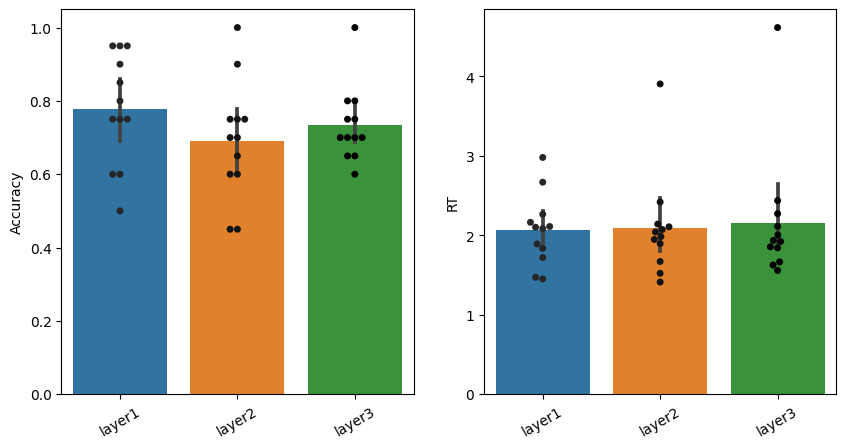

In [258]:
import seaborn as sns

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')


Text(0, 0.5, 'RT')

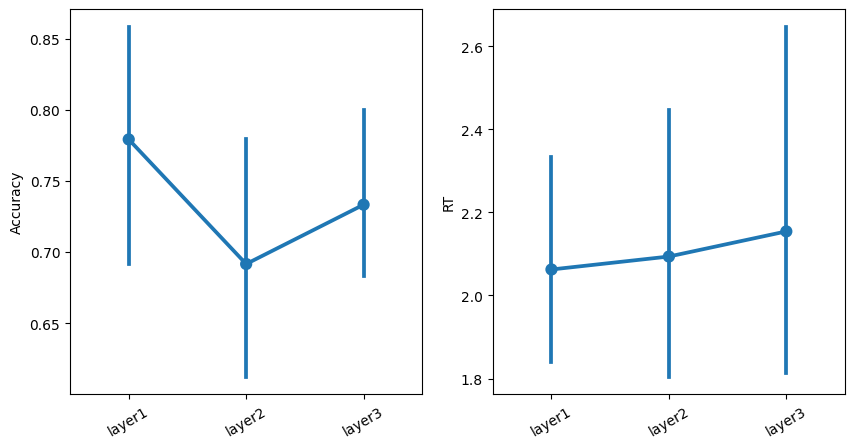

In [259]:
import seaborn as sns

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.pointplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
#sns.swarmplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.pointplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
#sns.swarmplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')


In [260]:
#this section loads the shelf dict in the state it is after finishing the testing session for this batch. 

import json
shelf_dict_after_test_name=PATH_TO_BATCH.parent / 'shelf after session closed.txt' #define the name of the relevant shelf for this stage
with open(shelf_dict_after_test_name) as f:
    data = f.read()
shelf_dict = json.loads(data)
shelf_dict

{'A8K19FZIUU2TE': 23,
 'A2U5OFMW8H30PC': 1,
 'A3L9EN8YL1HZWF': 25,
 'A28JWKICT1X73Z': 4,
 'A19TD2J8506A4Y': 3,
 'A2JLNOYPVW7W4V': 7,
 'A1AW4WCRVLE1C6': 9,
 'AS08ODODBG8BX': 15,
 'A2YC6PEMIRSOAA': 17,
 'A1NLJ1L4VCQYV2': 18,
 'A28OD52SMLYQ16': 21,
 'AOOLS8280CL0Z': 24,
 'A289D98Z4GAZ28': 27,
 'A2Z9PNETGAD9MS': 6,
 'A2QGCZDG0PIFEL': 22,
 'A2LB6A57BDB1X0': 35,
 'ACXPNVY0QDNHR': 39,
 'AMPR904VJJFZY': 2,
 'A2PD1J75MLX61W': 10,
 'A2B9V70J9P8BH8': 13,
 'A2Q0XPK1CBAKFA': 999,
 'A1PHDT66U6IK4Q': 41,
 'A34LSCB90T5KYE': 42,
 'A10JXOU89D5RXR': 50,
 'A3R7L46Y85VBQK': 999,
 '': 999,
 'A161M17XH251WL': 52,
 'ACNQDKXV6Z7DD': 999,
 'A362SLD9P7DE1M': 999,
 'A34WEYAH462CBS': 5,
 'A1YUVYT6ILN9NU': 8,
 'A3MC0GSXYQ2P7A': 11,
 'A3SSIUMI7ONK5W': 999,
 'A1I9RLJQ0BYN21': 0,
 'AG62J8MOAACK3': 999,
 'A2AESV6JRC0TC0': 999,
 'AOI6OCXVWYBX1': 999,
 'A1Y3WF3641GHGZ': 999,
 'A1BH4K9Z8JWLZ1': 999,
 'A3R2EH58I8Q4YI': 19,
 'A3948CIS0U9R41': 999,
 'A1CUCEYT4XN51I': 999,
 'AE3GUAQKXSNQ4': 999,
 'ABDQQ0F8DPWCK': 999,
 'AIYOM

In [261]:
# upload qualifications csv
workers_df = pd.read_csv(PATH_TO_BATCH.parent / 'Batch_workers.csv')
qualification_name_for_entire_experiment='UPDATE-completed memory rep'

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\User\\Desktop\\visualpilot2\\Visual-memory-task\\data\\unbalanced\\pilot_same_day\\batch 7\\Batch_workers.csv'

In [ ]:
#find all participants that exists in the shelf, and make sure they have a participantion code (so they wont be able to come back to this experiemnt)
all_shelf_workers_that_are_assigned_participantion=[]
for curr_key in shelf_dict.keys():
    if curr_key in workers_df['Worker ID'].values:
        workers_df.loc[workers_df['Worker ID']==curr_key,qualification_name_for_entire_experiment]=1
        all_shelf_workers_that_are_assigned_participantion.append(curr_key)

print(f'{len(all_shelf_workers_that_are_assigned_participantion)} were given a {qualification_name_for_entire_experiment}, names: {all_shelf_workers_that_are_assigned_participantion}')

#create a new shelf, that only contains the ids and numbers of valid participants (this is so we wont re-use thier custom trials order (csvs))
new_shelf_dict=dict()
for sub_id in final_participants_df.index: 
    sub_id = sub_id.split('_')[0]
    new_shelf_dict[sub_id]=shelf_dict[sub_id]
 

# append the final state of the last batch to the current batch for keeping all good participants 
previous_batch = 'batch' + str(int(batch_name[-1]) - 1)
root_dirs = list(PATH_TO_DATA.parent.iterdir())
target_dir = PATH_TO_DATA.parent / previous_batch
if target_dir in root_dirs:
    path_final_state_shelf = target_dir / 'shelf final state.txt'
    with open(path_final_state_shelf) as f:
        data = f.read()
        shelf_dict = json.loads(data)
    
    new_shelf_dict = new_shelf_dict | shelf_dict

batch_workers_df_extended.to_csv(PATH_TO_BATCH.parent / path.Path(batch_name+'_workers_results_extended_with_disqualification.csv'))
workers_df.to_csv(PATH_TO_BATCH.parent / path.Path(batch_name+'_workers_results_for_upload_after_encoding_and_test.csv'))
print('\n\ncopy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"\n')
json.dumps(new_shelf_dict)


71 were given a UPDATE-completed memory rep, names: ['A21UA6O7ZFAIQJ', 'A33B85TN97HQ33', 'A2C3LALU1PQK6L', 'A3AHPM404QJS3B', 'AV4WEZ2W0KSAJ', 'A2EZB41QENZZJ9', 'A1WVN6S68Y1M45', 'A3DT3GVRBFVXDZ', 'A3H1A5PGLBBWR0', 'AREYIJXFMXZL0', 'A6ZLFXYDXQAKE', 'AV3SDPGK4SMIM', 'A5SHVX15AQJQF', 'A9500TJQDB94E', 'A1UEHTBS0LZAA0', 'A1UV9BMWWQZY0H', 'A3G8XCOSTGW1CZ', 'AW4N0JPYAS2I2', 'A1IBY7KXFHJ2U2', 'AJ0IUCJ9UKE25', 'AE9KNJZWDCDSE', 'A1JLSWEISM2DWE', 'AQTAO3905UV0V', 'A2VZBQLSFZC519', 'A11BAIN13IGWCW', 'AXSBX0MCQNG3A', 'A2R99OKTW7QVER', 'ABICECSTT3MWF', 'A3HZFB2JLF3JMY', 'A1P6LFEAY9MWAY', 'A1VLH6ZN45VELT', 'A38OKN8QAGRENA', 'A124AKGRZFQ8N9', 'A1T90U2KNBZZR5', 'AIEKCWYZTS41V', 'A1Z6SEA95MEBTN', 'A1VSEDABJFNUVQ', 'A38PDC36OO9X5J', 'A2FQVRBXJZQAWT', 'A137V1J5GNNZTH', 'A4H1T35G1RHI3', 'AP60DZINXAPCI', 'A3N692NN9S43L9', 'AKWAO862UBFU1', 'A3JMTHRS9M6NJO', 'A37B4IKMX7A74O', 'A1K4FKVCBTX1RN', 'A3KVIZLKSASAES', 'A2EFMN1AFPRCL', 'A3EFT5ETMGRUC2', 'A15UL5WCZIZCAV', 'A1QG0HL1XSSGNU', 'A36NPTH2FLH2PA', 'A1UTNAK70

'{"A3H1A5PGLBBWR0": 4, "A3HZFB2JLF3JMY": 28, "AE9KNJZWDCDSE": 23, "A1K4FKVCBTX1RN": 44, "AIEKCWYZTS41V": 19, "A1UEHTBS0LZAA0": 17, "A2EFMN1AFPRCL": 48, "A1IGKJ200N82S9": 63, "A3G8XCOSTGW1CZ": 13, "A37B4IKMX7A74O": 43, "AP60DZINXAPCI": 39, "AV3SDPGK4SMIM": 14, "A1QG0HL1XSSGNU": 46, "AXSBX0MCQNG3A": 18, "A33B85TN97HQ33": 0, "A36NPTH2FLH2PA": 49, "A3OZPR0C0LSSZ0": 57, "A21UA6O7ZFAIQJ": 0, "A1VLH6ZN45VELT": 33, "A6ZLFXYDXQAKE": 10, "ABICECSTT3MWF": 24, "A1WVN6S68Y1M45": 9, "A3AHPM404QJS3B": 2, "A2LI1OIR4BVJRW": 62, "AQTAO3905UV0V": 26, "A2VZBQLSFZC519": 22, "AKWAO862UBFU1": 41, "A1UTNAK70QH9JS": 51, "A1P6LFEAY9MWAY": 32}'

In [262]:
#create a new shelf, that only contains the ids and numbers of valid participants (this is so we wont re-use thier custom trials order (csvs))
new_shelf_dict=dict()
for sub_id in final_participants_df.index: 
    sub_id = sub_id.split('_')[0]
    new_shelf_dict[sub_id]=shelf_dict[sub_id]
 

# append the final state of the last batch to the current batch for keeping all good participants 
previous_batch = 'batch' + str(int(batch_name[-1]) - 1)
root_dirs = list(PATH_TO_DATA.parent.iterdir())
target_dir = PATH_TO_DATA.parent / previous_batch
if target_dir in root_dirs:
    path_final_state_shelf = target_dir / 'shelf final state.txt'
    with open(path_final_state_shelf) as f:
        data = f.read()
        shelf_dict = json.loads(data)
    
    new_shelf_dict = new_shelf_dict | shelf_dict



print('\n\ncopy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"\n')
json.dumps(new_shelf_dict)



copy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"



'{"ACUK17I51KVXF": 40, "AW9ODYOD9PYHX": 14, "A1SHLWKA0UH1IS": 31, "AFT9JOHMU11KY": 22, "A1N37RFT8OXBNN": 17, "AB09F0Q4T10TE": 7, "A1F0VEHWK3IAF4": 12, "A1JT6ZF5PMQBM1": 37, "A3QYA7EFCS7BA2": 34, "A3EWKKJTP2GY2L": 38, "A2KLIBLDVDV144": 35, "AGB6853RIDWJ8": 3}'